<a href="https://colab.research.google.com/github/MakineniSuryaTej/MLProject/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign for Banking Products

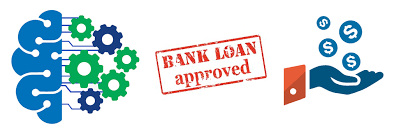

Description

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.



# **Step 1(Basic Info about dataset)**

---



## **1.1 Importing the required libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

## **1.2 Loading the dataset**

In [4]:
dataset=pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx")
#Top 10 rows of the dataset
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
#All the columns in the dataset
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**Attribute Information**::
**ID**: Customer ID,
**Age**: Customer's age in completed years,
**Experience**: #years of professional experience,
**Income**: Annual income of the customer,
**ZIP Code**: Home Address ZIP code,
**Family**: Family size of the customer,
**CCAvg**: Avg. spending on credit cards per month
**Education**: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional,
**Mortgage**: Value of house mortgage if any. ($000),
**Personal Loan**: Did this customer accept the personal loan offered in the last campaign?,
**Securities Account**: Does the customer have a securities account with the bank?,
**CD Account**: Does the customer have a certificate of deposit (CD) account with the bank?,
**Online**: Does the customer use internet banking facilities?,
**Credit card**: Does the customer use a credit card issued by the bank?

## **1.3 Checking the Datatypes,Shape,Statistical summary,Other information**

In [6]:
#Data types of all the coloumns
dataset.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
#Shape of the dataset
dataset.shape

(5000, 14)

In [8]:
#Various statistical details
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
#Other information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
#Whether there are any null values in the dataset
dataset.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

# **Step 2(Cleaning the dataset)**

---



## **2.1 Replace with median**

In [11]:
#Negative values replaced with median
dataset[dataset[['Experience']]<0]=dataset['Experience'].median()
dataset['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

## **2.2 Checking the correlation**

In [12]:
#Correlation between Age-Experience and Age-Income
corr1=dataset['Age'].corr(dataset['Experience'],method='spearman')
corr2=dataset['Age'].corr(dataset['Income'],method='spearman')
corr1,corr2

(0.9799876928252076, -0.05677204356456095)

Since from the above correlation values between Age-Experience and Age-Income, the correlation value of Age-Experience is almost equal to 1 but whereas considering the Age-Income the value is negative and nowhere near to 1.Therefore,by considering this we can drop the Experience column.

In [13]:
#Correlation matrix
dataset.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048730,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.048730,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


From the above matrix out of all only the correlation value between Age and Experience is highest.

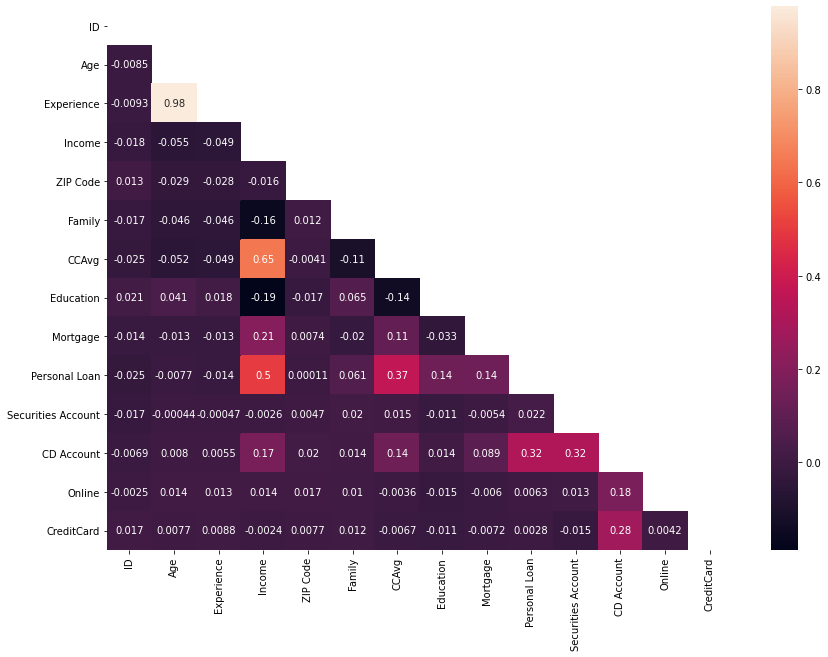

In [14]:
#Representation of above matrix using Heatmap
mask=np.zeros_like(dataset.corr())
tri_indices=np.triu_indices_from(mask)
mask[tri_indices]=True
#Using mask because we need only the lower triangle of the matrix
plt.figure(figsize=(14,10))
sb.heatmap(dataset.corr(),mask=mask,annot=True)
plt.show()

In the above heatmap we can clearly observe The color for Experience and Age are highly correlated.
Income-Personal Loan and Income-CCAvg are both moderately correlated. 

## **2.3 Checking for duplicate values and removing them**

In [15]:
#Whether duplicate elements are there or not
dataset_duplicate=dataset[dataset.duplicated()]
dataset_duplicate,dataset_duplicate.shape

(Empty DataFrame
 Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
 Index: [], (0, 14))

There are no duplicate elements in our dataset.Although if there are any duplicateswe use the below code.

In [16]:
#Droping the duplicate elements
dataset.drop_duplicates(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


## **2.4 Checking for outliers**

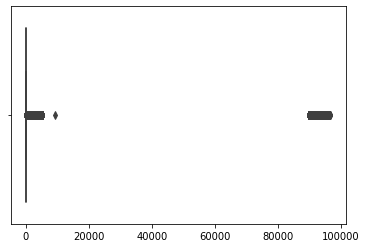

In [17]:
#Before removal of outliers
sb.boxplot(dataset)

In [18]:
#Outliers Removal
max_threshold=dataset.quantile(0.95)
min_threshold=dataset.quantile(0.05)
'''dataset[(dataset['Income']<max_threshold) & (dataset['Income']>min_threshold)]
sb.boxplot(dataset['Income'])'''
IQR=max_threshold-min_threshold
dataset=dataset[~((dataset<(max_threshold-1.5*IQR))|(dataset>(min_threshold+1.5*IQR))).any(axis=1)]
dataset.shape

(4927, 14)

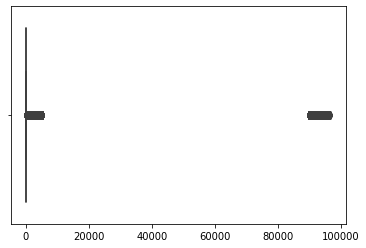

In [19]:
#After removal of outliers
sb.boxplot(dataset)

Hence by the removal of outliers the shape of the dataset has been reduced and the cleaning of the data is complted

## **2.5 Final dataset**

In [20]:
dataset=dataset.drop(['ID','Experience'],axis=1)
dataset.head(8)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1


In [21]:
dataset.shape

(4927, 12)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4927 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4927 non-null   int64  
 1   Income              4927 non-null   int64  
 2   ZIP Code            4927 non-null   int64  
 3   Family              4927 non-null   int64  
 4   CCAvg               4927 non-null   float64
 5   Education           4927 non-null   int64  
 6   Mortgage            4927 non-null   int64  
 7   Personal Loan       4927 non-null   int64  
 8   Securities Account  4927 non-null   int64  
 9   CD Account          4927 non-null   int64  
 10  Online              4927 non-null   int64  
 11  CreditCard          4927 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 500.4 KB


# **Step 3(Exploratory Data Analysis)**

## **3.1 Unique values count in the dataset**

In [23]:
#Printing all unique values and their counts
for i in dataset.columns:
  print(i,"::","Total unique elements:",dataset[i].nunique())
  print("Unquie element count\n",dataset[i].value_counts())

Age :: Total unique elements: 45
Unquie element count
 35    147
43    146
52    142
58    142
54    138
50    136
41    136
30    136
56    135
34    131
59    131
39    131
57    129
51    127
60    125
46    125
40    125
55    125
31    124
45    124
42    123
62    122
61    121
29    120
44    118
32    118
33    117
48    117
38    115
47    113
49    112
53    109
36    107
63    105
37    102
28    101
27     90
65     80
26     77
64     76
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
Income :: Total unique elements: 161
Unquie element count
 44     85
38     84
81     83
41     82
39     81
       ..
198     2
200     1
224     1
218     1
203     1
Name: Income, Length: 161, dtype: int64
ZIP Code :: Total unique elements: 466
Unquie element count
 94720    168
94305    125
95616    115
90095     71
93106     56
        ... 
94404      1
96145      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 466, dtype: int64
Family :: Total 

From the above having more unique value count might not be useful for the prediction of the tarrget variable.So it might be better if we drop the ZIP Code also.

In [24]:
dataset=dataset.drop(['ZIP Code'],axis=1)

## **3.2 Value count of all categorical data**

1    1452
2    1270
4    1208
3     997
Name: Family, dtype: int64


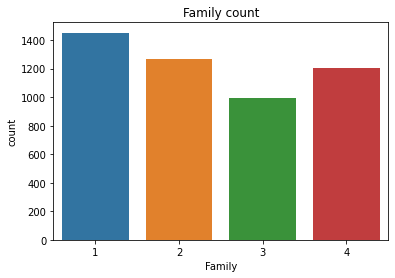

In [25]:
#Unique counts of Family column
print(dataset['Family'].value_counts())
sb.countplot(dataset['Family'])
plt.title("Family count")
plt.show()

1    2060
3    1482
2    1385
Name: Education, dtype: int64


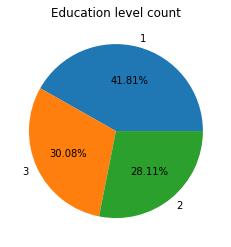

In [26]:
#Unique counts of Education column
print(dataset['Education'].value_counts())
plt.pie(dataset['Education'].value_counts(),labels=['1','3','2'],autopct='%1.2f%%')
plt.title("Education level count")
plt.show()

## **3.3 Filtering**

In [27]:
#Number of people with zero mortgage
dataset[dataset['Mortgage']==0].shape[0]

3456

In [28]:
#Number of people with zero credit card spending per month
dataset[dataset['CreditCard']==0].shape[0]

3475

In [29]:
#Number of people whose age is more than 35 and less than 55
dataset[(dataset['Age']<55) & (dataset['Age']>35)].shape[0]

2346

In [30]:
#Number of customers with family size 3 or 4
dataset[(dataset['Family']==3) | (dataset['Family']==4)].shape[0]

2205

In [31]:
#Number of people who had taken the personal loan
dataset[dataset['Personal Loan']==1].shape[0]

438

## **3.4 Univariate Analysis**

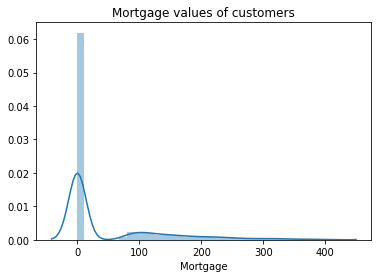

In [32]:
#Histogram representation for the mortgagae values
sb.distplot(dataset['Mortgage'])
plt.title("Mortgage values of customers")
plt.show()

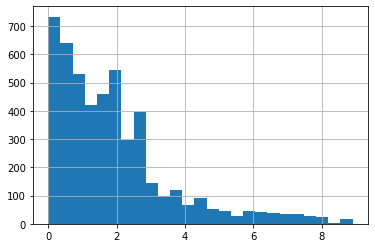

In [33]:
#Histogram for the CCAvg
dataset['CCAvg'].hist(bins=25)

Here the distribution is skewed towards right.

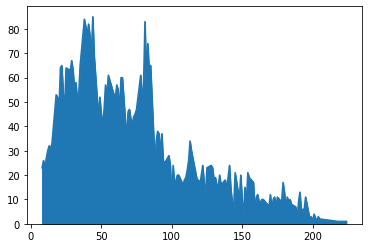

In [34]:
#Area graph for the Income column
dataset['Income'].value_counts().sort_index().plot.area()

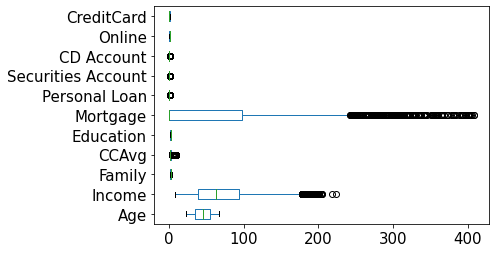

In [35]:
#Boxploting excluding the zip code for better representation
dataset[['Age','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']].boxplot(grid=False,vert=False,fontsize=15)

Since the credit card,online,cd account,securities account and personal loan have only two values either 0 or 1,so it might not good for representing it with boxplot but for Mortgage,CCAvg,Income,Age it is clearly represented. 

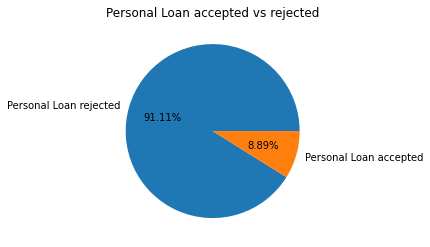

In [36]:
plt.pie(dataset['Personal Loan'].value_counts(),labels=['Personal Loan rejected','Personal Loan accepted'],autopct='%1.2f%%')
plt.title("Personal Loan accepted vs rejected")
plt.show()

From the pie chart only 9.33% have taken the personal loan and the rest 90.67% have not taken the personal loan. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3c72fe908>,
      dtype=object)

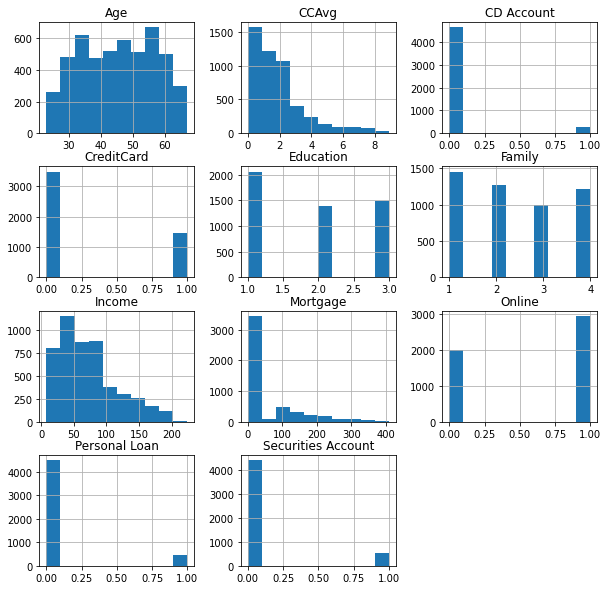

In [37]:
#All the histographic representation of all variables
dataset.hist(bins=10,figsize =(10,10))

From the pair plot graphs only two graphs Income and CCAvg are skewed where we have apply transformations which will be in step 4.

## **3.5 Bivariate Analysis**

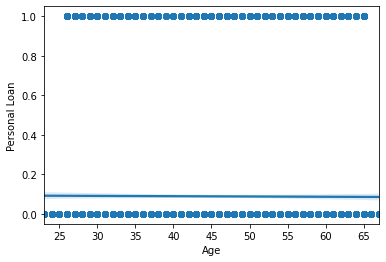

In [38]:
#Regression plot representation between Age and Personal Loan
sb.regplot(x='Age',y='Personal Loan',data=dataset)

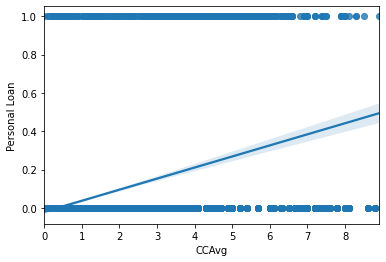

In [39]:
#Regression plot representation between CCAvg and Personal Loan
sb.regplot(x='CCAvg',y='Personal Loan',data=dataset)

From the regression plots the first graph,the age and personal loan have inverse relationship that is their correlation value is negative.

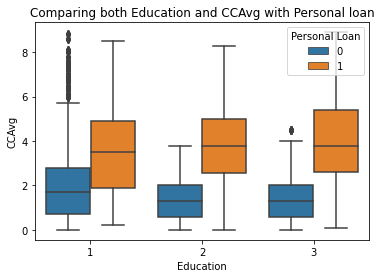

In [40]:
#Boxplot Representation
sb.boxplot(x = 'Education', y = 'CCAvg',hue='Personal Loan', data = dataset)
plt.title("Comparing both Education and CCAvg with Personal loan")
plt.show()

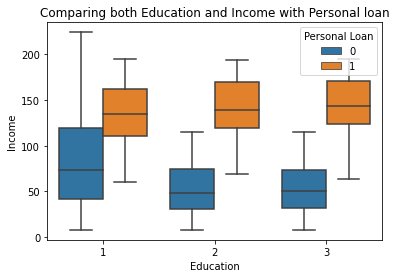

In [41]:
#Boxplot Representation
sb.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset)
plt.title("Comparing both Education and Income with Personal loan")
plt.show()

From the above boxplot who has taken personal loan have higher CCAvg and same income values.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


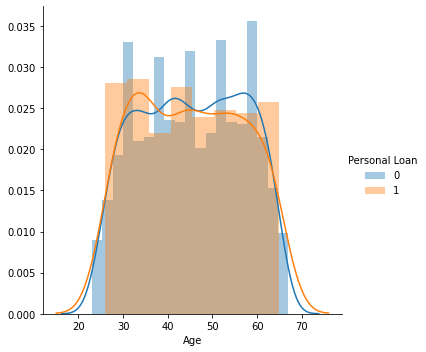

In [42]:
sb.FacetGrid(dataset,hue='Personal Loan',size=5).map(sb.distplot,'Age').add_legend()

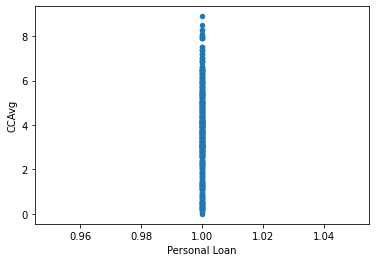

In [43]:
#Scatter plot between CCAvg and Personal Loan and those who have taken the personal loan
dataset[dataset['Personal Loan']==1].plot.scatter(x='Personal Loan', y='CCAvg')

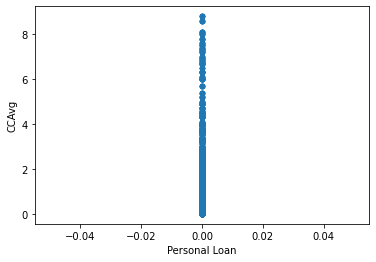

In [44]:
#Scatter plot between CCAvg and Personal Loan and those who have not taken the personal loan
dataset[dataset['Personal Loan']==0].plot.scatter(x='Personal Loan', y='CCAvg')

From the above two scatter plots customers who ccavg more than2.3(approx) and below 6.2(approx) have a chance of taking the personal loan.

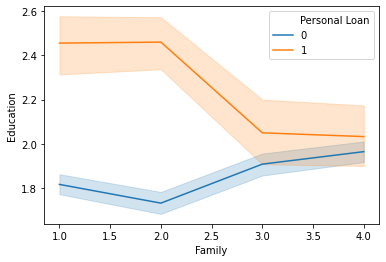

In [45]:
#Line plot betwenn Family and Education with respective to Personal Loan
sb.lineplot(x='Family',y='Education',hue='Personal Loan',data=dataset)

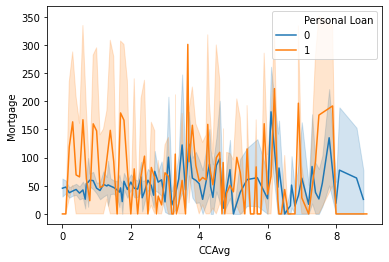

In [46]:
#Line plot betwenn CCAvg and Mortgage with respective to Personal Loan
sb.lineplot(x='CCAvg',y='Mortgage',hue='Personal Loan',data=dataset)

The customers those who have taken the personal loan have high Mortgage values.
The customers those who have not taken the personal loan have low education levels.

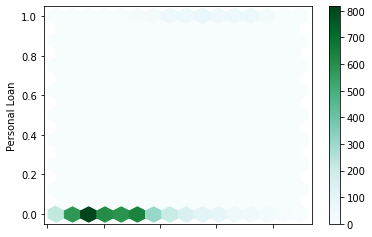

In [47]:
#Hex plot representation between Income and Personal Loan
dataset.plot.hexbin(x='Income',y='Personal Loan',gridsize=15)

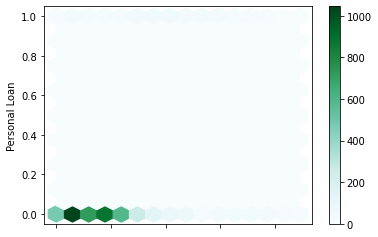

In [48]:
#Hex plot representation between CCAvg and Personal Loan
dataset.plot.hexbin(x='CCAvg',y='Personal Loan',gridsize=15)

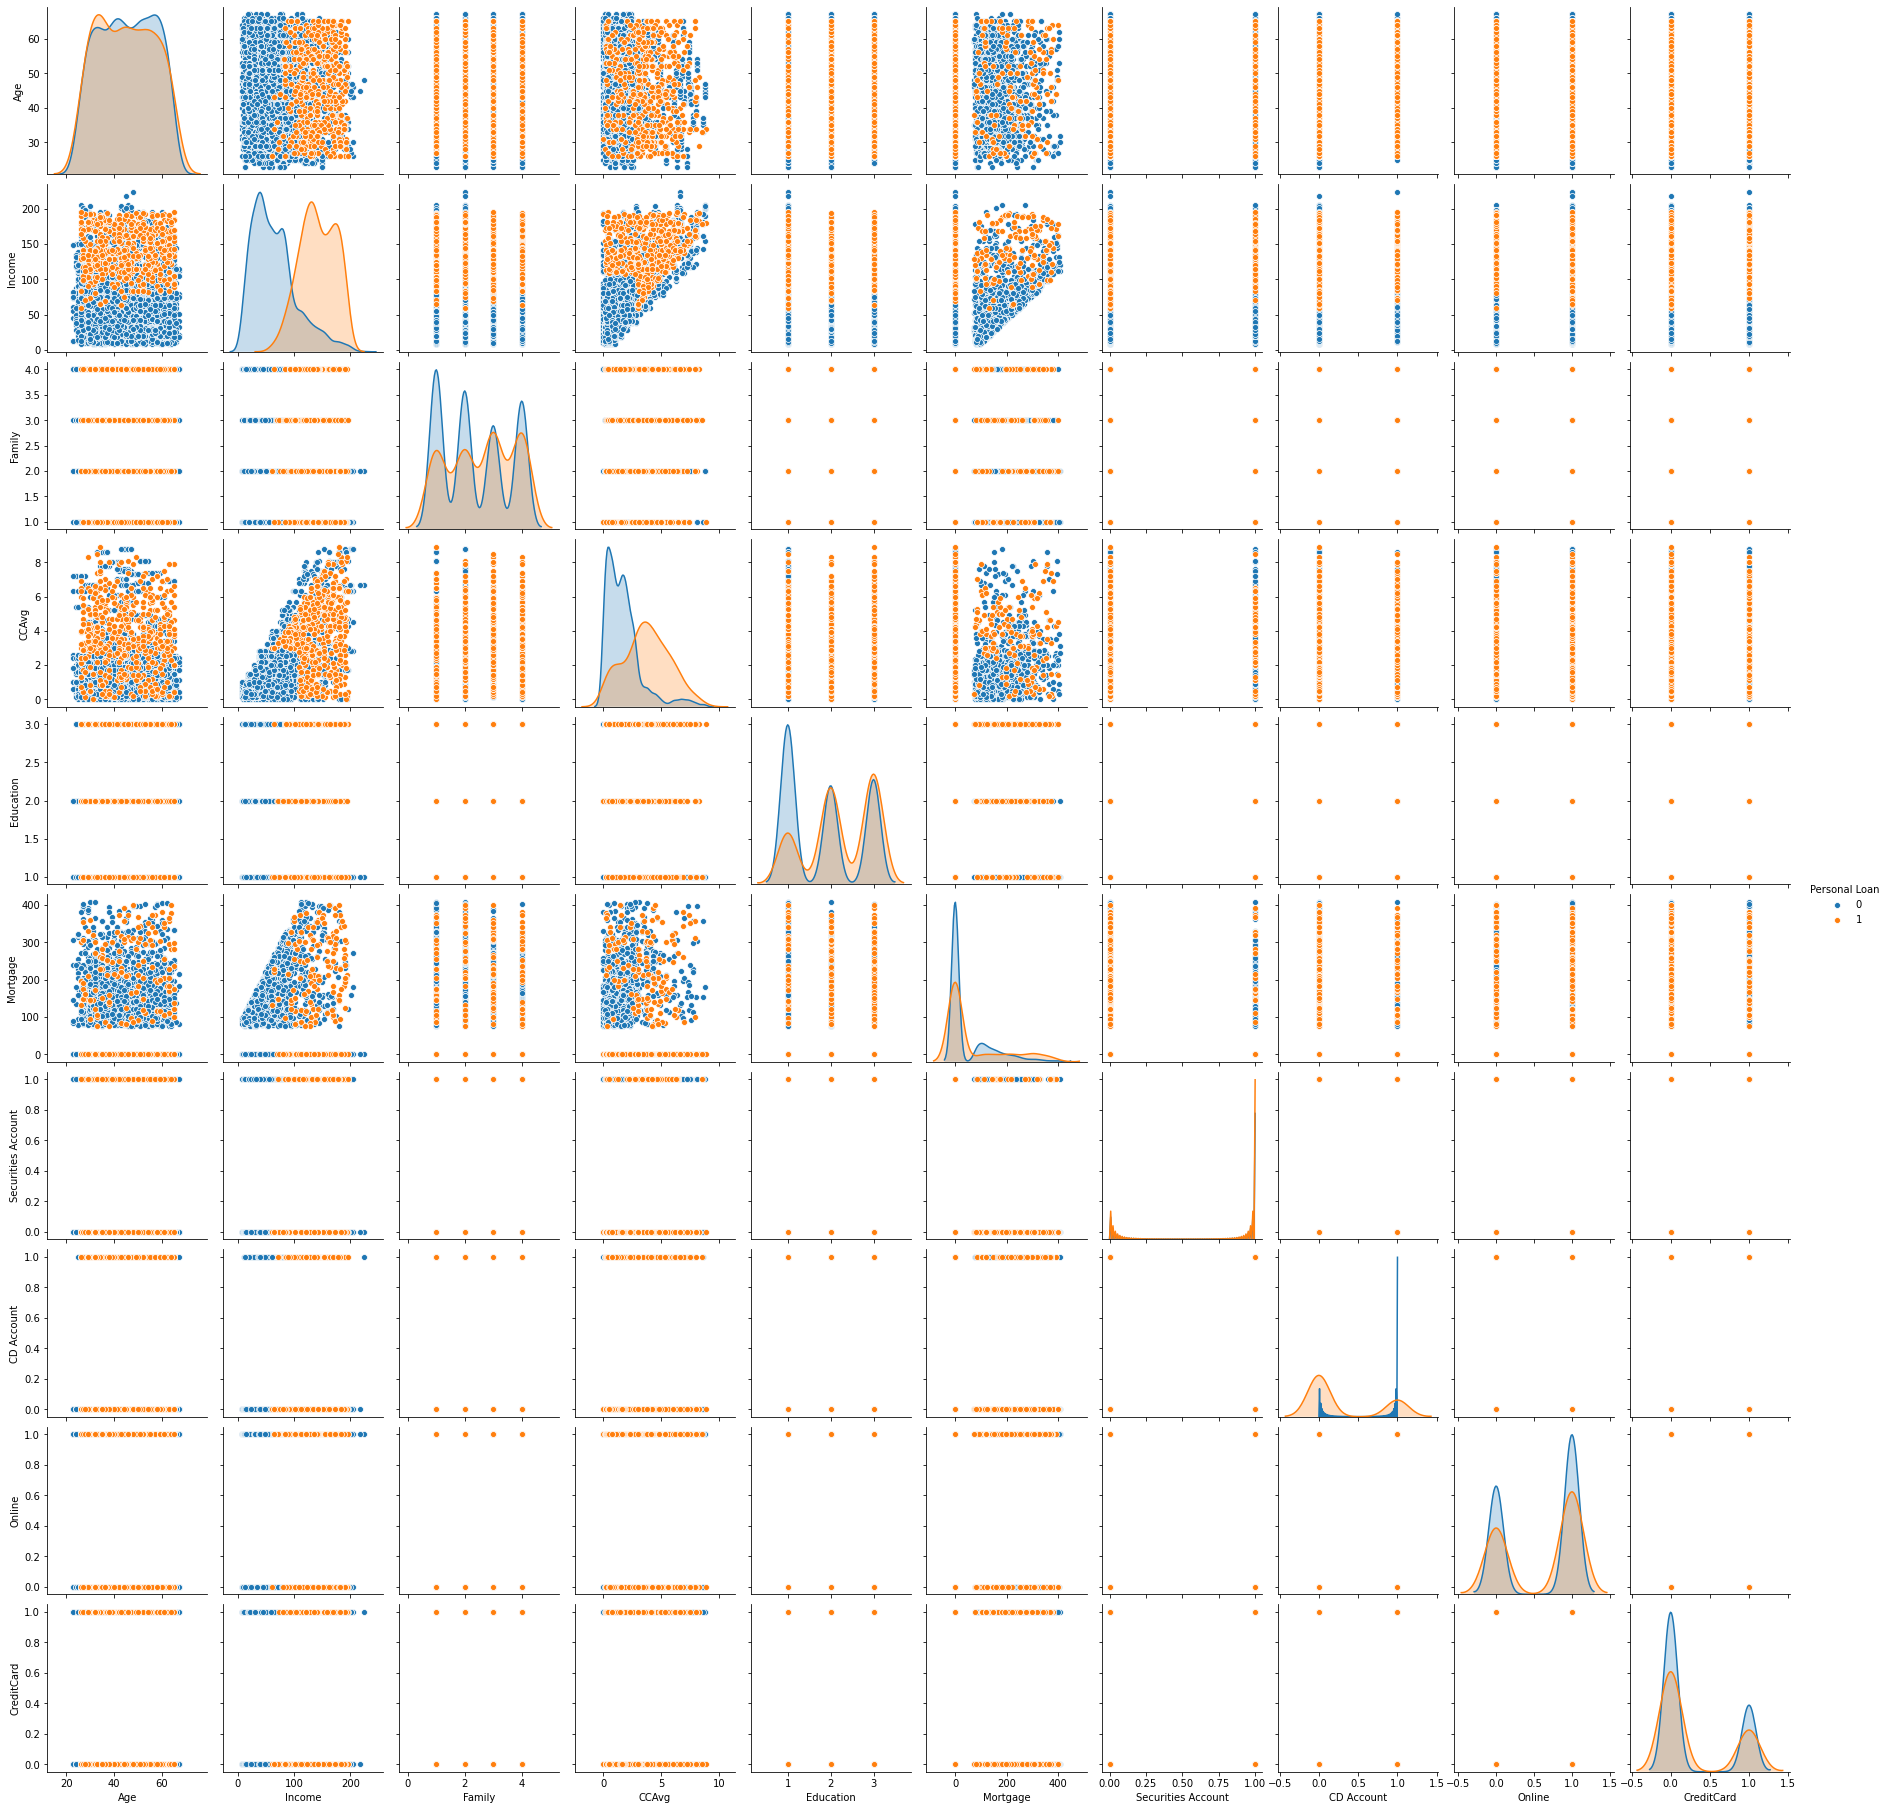

In [49]:
#Finally  pair plotting for relation between all the variables with reaspective to Personal Loan
sb.pairplot(dataset,hue='Personal Loan')

From all the above analysis some variables are inversly proportinal and most of the variables are very important for considering in the training dataset.

# **Step4(Transformation)**

## **4.1 Transfroming Income column**

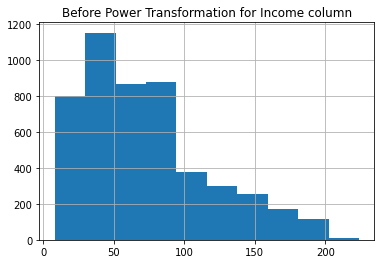

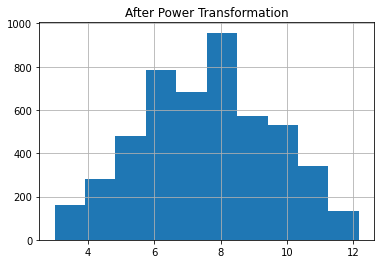

In [50]:
#Power Transformation for the Income column
pt=PowerTransformer(method='yeo-johnson',standardize=False)
plt.title("Before Power Transformation for Income column")
dataset['Income'].hist(bins=10)
plt.show()
dataset['Income']=pt.fit_transform(dataset['Income'].values.reshape(-1,1))
plt.title("After Power Transformation")
dataset['Income'].hist(bins=10)
plt.show()

Now as per the above changes we can observe that after applying the power transformation the skewed graph has changed to Uniformly distributed graph.

## **4.2 Transforming CCAvg column**

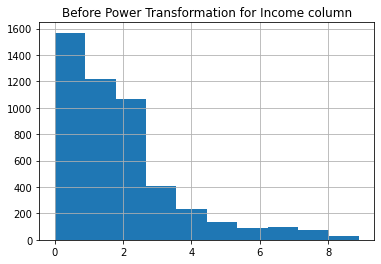

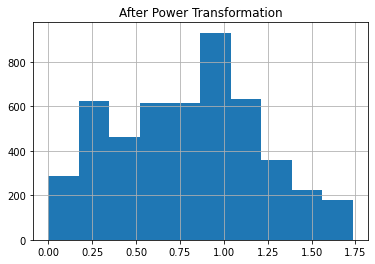

In [51]:
#Power Transformation for the CCAvg column
pt=PowerTransformer(method='yeo-johnson',standardize=False)
plt.title("Before Power Transformation for Income column")
dataset['CCAvg'].hist(bins=10)
plt.show()
dataset['CCAvg']=pt.fit_transform(dataset['CCAvg'].values.reshape(-1,1))
plt.title("After Power Transformation")
dataset['CCAvg'].hist(bins=10)
plt.show()

## **4.3 Transforming Mortgage column**

In [52]:
dataset['Mortgage_Change']=pd.cut(dataset['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
dataset.drop(['Mortgage'],axis=1,inplace=True)
dataset.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Change
0,25,6.903058,4,0.847627,1,0,1,0,0,0,0
1,45,5.935205,3,0.816762,1,0,1,0,0,0,0
2,39,3.527564,1,0.635135,1,0,0,0,0,0,0
3,35,9.103606,1,1.111786,2,0,0,0,0,0,0
4,35,6.668466,4,0.635135,2,0,0,0,0,1,0


# **Step 5(Splitting data)**

## **Dividing input and output variables**

In [53]:
X=dataset.drop(['Personal Loan'],axis=1)
y=dataset['Personal Loan']
X.shape,y.shape

((4927, 10), (4927,))

## **Dividing in Ratio 70:30**

In [54]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

In [55]:
X_train.shape,X_test.shape

((3448, 10), (1479, 10))

In [56]:
y_train.shape,y_test.shape

((3448,), (1479,))

# **Step 6(Logistic Regression)**

## **Training and Predicting**

In [57]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
log_acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_acc))

Accuracy of logistic regression classifier on test set: 0.96


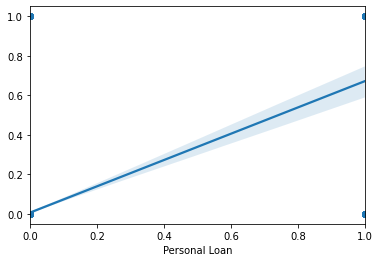

In [58]:
sb.regplot(y_test,y_pred)

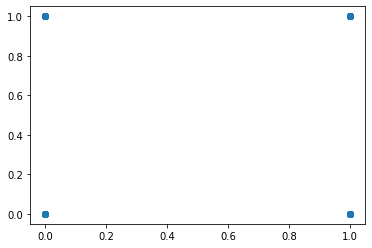

In [59]:
plt.scatter(y_test,y_pred)

## **Confusion Matrix**

In [60]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1339    9]
 [  43   88]]


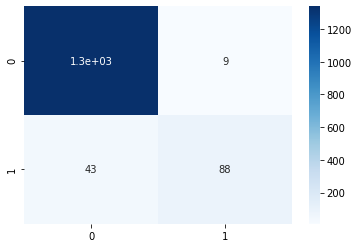

In [61]:
sb.heatmap(matrix, annot=True, cmap='Blues')

## **Result set for final Evaluation** 

In [62]:
results=[]
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
res=cross_val_score(log_model, X, y, cv=kfold, scoring=scoring)
results.append(res)

# **Step 7(Metrics of Logistic Regression)**

## **ROC Curve**

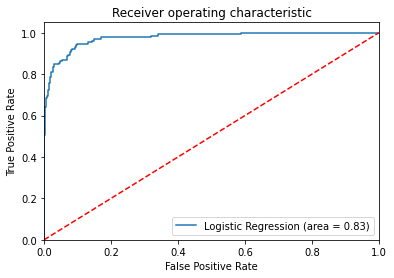

In [63]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## **Precision Score**

In [64]:
print("Logistic Regression algorithm Precision score is: {}".format(precision_score(y_test,y_pred)))

Logistic Regression algorithm Precision score is: 0.9072164948453608


Logistic: f1=0.772 auc=0.804


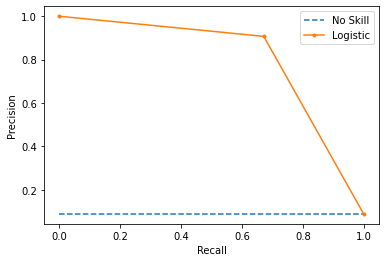

In [65]:
#Precision Score Curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred)
lr_f1, lr_auc = f1_score(y_test,y_pred), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

## **F1 Score and other metrics**

In [66]:
#F1 Score
print("F1 score for Logistic Regression Algorithm is: {}".format(f1_score(y_test,y_pred)))

F1 score for Logistic Regression Algorithm is: 0.7719298245614035


In [67]:
#Recall Score
print("Recall score for Logistic Regression Algorithm is: {}".format(recall_score(y_test,y_pred)))

Recall score for Logistic Regression Algorithm is: 0.6717557251908397


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03515889114266396
Mean Squared Error: 0.03515889114266396
Root Mean Squared Error: 0.18750704291483017


In [69]:
#Final Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1348
           1       0.91      0.67      0.77       131

    accuracy                           0.96      1479
   macro avg       0.94      0.83      0.88      1479
weighted avg       0.96      0.96      0.96      1479



# **Step 8(Other Classification Algorithms)**

### **Decision Tree Classifier Algorithm**

In [70]:
dec_model=DecisionTreeClassifier()
dec_model.fit(X_train, y_train)
y_pred = dec_model.predict(X_test)
dec_acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of DecisionTree classifier on test set: {:.2f}'.format(dec_acc))

Accuracy of DecisionTree classifier on test set: 0.98


In [71]:
#Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1337   11]
 [  12  119]]


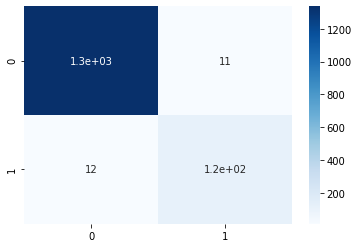

In [72]:
sb.heatmap(matrix, annot=True, cmap='Blues')

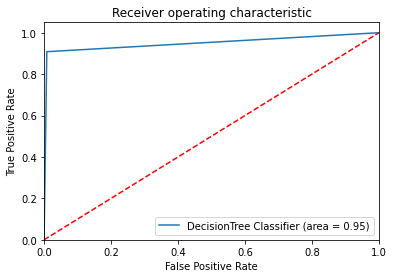

In [73]:
#ROC Curve
dec_roc_auc = roc_auc_score(y_test, dec_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dec_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTree Classifier (area = %0.2f)' % dec_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

DecisionTree Classifier Precision score is: 0.9153846153846154
DecisionTree Classifier: f1=0.912 auc=0.916


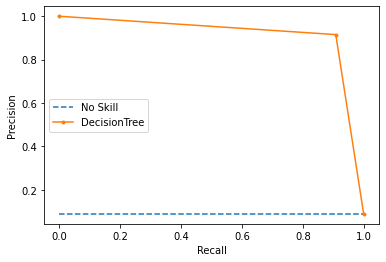

In [74]:
#Presion score and curve
print("DecisionTree Classifier Precision score is: {}".format(precision_score(y_test,y_pred)))
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred)
lr_f1, lr_auc = f1_score(y_test,y_pred), auc(lr_recall, lr_precision)
print('DecisionTree Classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='DecisionTree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [75]:
#F1 Score
print("F1 score for DecisionTree Classifier is: {}".format(f1_score(y_test,y_pred)))
#Recall Score
print("Recall score for DecisionTree Classifier is: {}".format(recall_score(y_test,y_pred)))
#Final Classification Report
print(classification_report(y_test, y_pred))

F1 score for DecisionTree Classifier is: 0.9118773946360154
Recall score for DecisionTree Classifier is: 0.9083969465648855
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1348
           1       0.92      0.91      0.91       131

    accuracy                           0.98      1479
   macro avg       0.95      0.95      0.95      1479
weighted avg       0.98      0.98      0.98      1479



In [76]:
#Results set
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
res=cross_val_score(dec_model, X, y, cv=kfold, scoring=scoring)
results.append(res)

### **Random Forest Classifier Algorithm**

In [77]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
rfc_acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(rfc_acc))

Accuracy of RandomForest classifier on test set: 0.99


In [78]:
#Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1344    4]
 [  10  121]]


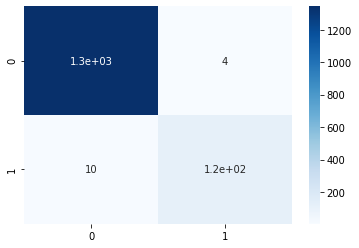

In [79]:
sb.heatmap(matrix, annot=True, cmap='Blues')

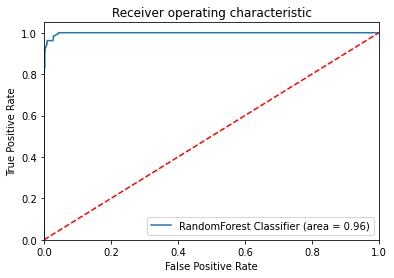

In [80]:
#ROC Curve
rfc_roc_auc = roc_auc_score(y_test, rfc_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

RandomForest Classifier Precision score is: 0.968
RandomForest Classifier: f1=0.945 auc=0.949


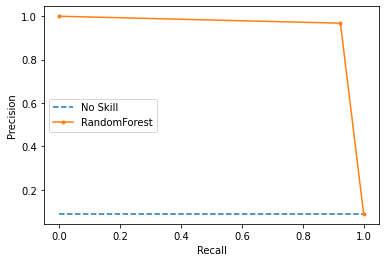

In [81]:
#Presion score and curve
print("RandomForest Classifier Precision score is: {}".format(precision_score(y_test,y_pred)))
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred)
lr_f1, lr_auc = f1_score(y_test,y_pred), auc(lr_recall, lr_precision)
print('RandomForest Classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='RandomForest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [82]:
#F1 Score
print("F1 score for RandomForest Classifier is: {}".format(f1_score(y_test,y_pred)))
#Recall Score
print("Recall score for RandomForest Classifier is: {}".format(recall_score(y_test,y_pred)))
#Final Classification Report
print(classification_report(y_test, y_pred))

F1 score for RandomForest Classifier is: 0.9453124999999999
Recall score for RandomForest Classifier is: 0.9236641221374046
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1348
           1       0.97      0.92      0.95       131

    accuracy                           0.99      1479
   macro avg       0.98      0.96      0.97      1479
weighted avg       0.99      0.99      0.99      1479



In [83]:
#Results set
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
res=cross_val_score(rfc_model, X, y, cv=kfold, scoring=scoring)
results.append(res)

### **KNeighbors Classifier Algorithm**

In [84]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of KNeighbors classifier on test set: {:.2f}'.format(knn_acc))

Accuracy of KNeighbors classifier on test set: 0.96


In [85]:
#Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1343    5]
 [  58   73]]


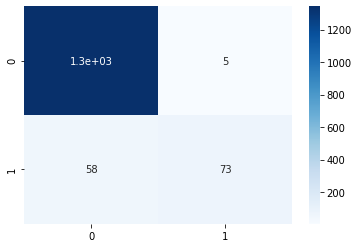

In [86]:
sb.heatmap(matrix, annot=True, cmap='Blues')

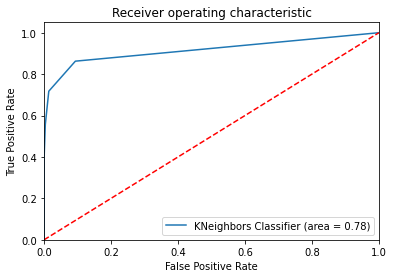

In [87]:
#ROC Curve
knn_roc_auc = roc_auc_score(y_test, knn_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors Classifier (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

KNeighbors Classifier Precision score is: 0.9358974358974359
KNeighbors Classifier: f1=0.699 auc=0.766


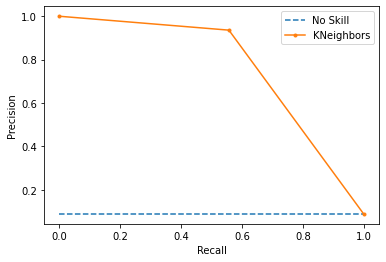

In [88]:
#Presion score and curve
print("KNeighbors Classifier Precision score is: {}".format(precision_score(y_test,y_pred)))
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred)
lr_f1, lr_auc = f1_score(y_test,y_pred), auc(lr_recall, lr_precision)
print('KNeighbors Classifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='KNeighbors')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [89]:
#F1 Score
print("F1 score for KNeighbors Classifier is: {}".format(f1_score(y_test,y_pred)))
#Recall Score
print("Recall score for KNeighbors Classifier is: {}".format(recall_score(y_test,y_pred)))
#Final Classification Report
print(classification_report(y_test, y_pred))

F1 score for KNeighbors Classifier is: 0.6985645933014354
Recall score for KNeighbors Classifier is: 0.5572519083969466
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1348
           1       0.94      0.56      0.70       131

    accuracy                           0.96      1479
   macro avg       0.95      0.78      0.84      1479
weighted avg       0.96      0.96      0.95      1479



In [90]:
#Results set
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
res=cross_val_score(knn_model, X, y, cv=kfold, scoring=scoring)
results.append(res)

## **GaussianNB Algorithm**

In [91]:
gnb_model=GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)
gnb_acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of GaussianNB Algorithm on test set: {:.2f}'.format(gnb_acc))

Accuracy of GaussianNB Algorithm on test set: 0.91


In [92]:
#Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1285   63]
 [  70   61]]


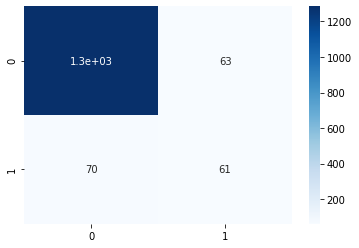

In [93]:
sb.heatmap(matrix, annot=True, cmap='Blues')

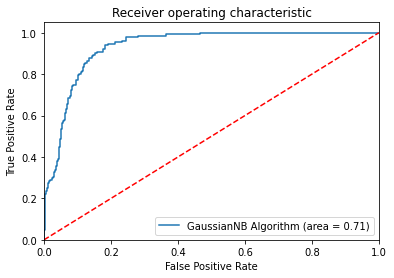

In [94]:
#ROC Curve
gnb_roc_auc = roc_auc_score(y_test, gnb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GaussianNB Algorithm (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

GaussianNB Algorithm Precision score is: 0.49193548387096775
GaussianNB Algorithm: f1=0.478 auc=0.502


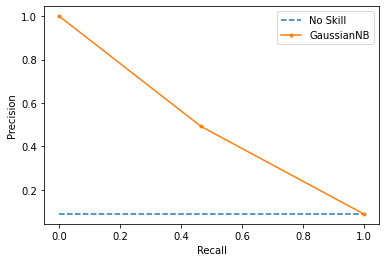

In [95]:
#Presion score and curve
print("GaussianNB Algorithm Precision score is: {}".format(precision_score(y_test,y_pred)))
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred)
lr_f1, lr_auc = f1_score(y_test,y_pred), auc(lr_recall, lr_precision)
print('GaussianNB Algorithm: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='GaussianNB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [96]:
#F1 Score
print("F1 score for GaussianNB Algorithm is: {}".format(f1_score(y_test,y_pred)))
#Recall Score
print("Recall score for GaussianNB Algorithm is: {}".format(recall_score(y_test,y_pred)))
#Final Classification Report
print(classification_report(y_test, y_pred))

F1 score for GaussianNB Algorithm is: 0.47843137254901963
Recall score for GaussianNB Algorithm is: 0.46564885496183206
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1348
           1       0.49      0.47      0.48       131

    accuracy                           0.91      1479
   macro avg       0.72      0.71      0.71      1479
weighted avg       0.91      0.91      0.91      1479



In [97]:
#Results set
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
res=cross_val_score(gnb_model, X, y, cv=kfold, scoring=scoring)
results.append(res)

## **All Algorithms Comparision**

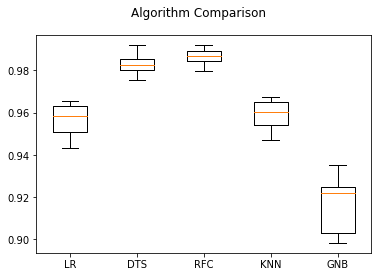

In [98]:
#BoxPlot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(['LR','DTS','RFC','KNN','GNB'])
plt.show()

# **Step 9(Business Understanding)**

First we have removed the id column because it is always unique and does not depends on the output variable and the removed then Experience column since it is highly correlated to the Age.After we removed the outliers and we also delted the Zipcode since it has more number of unique values.
Then we plotted the different graphs for univariate and bivariate analysis for understanding between the input and output variables and performed power transformation to the categorical values and also changed the mortgage column slightly.
By applying the different algorithms to our dataset and plotting a boxplot with their accuracies,it has shown that the Random Forest Classifier Algorithm has shown high accuracy value of 0.99(approx) i.e
the Random Forest Classifier is very good at predicting the people who are gonna by take the personal loan and who do not.